# Análisis de pérdida de clientes en Gimnasio Model Fitness 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#INICIALIZACIÓN" data-toc-modified-id="INICIALIZACIÓN-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>INICIALIZACIÓN</a></span></li><li><span><a href="#CARGA-DE-DATOS" data-toc-modified-id="CARGA-DE-DATOS-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>CARGA DE DATOS</a></span></li><li><span><a href="#EXPLORACIÓN-Y-PROCESAMIENTO-DE-DATOS" data-toc-modified-id="EXPLORACIÓN-Y-PROCESAMIENTO-DE-DATOS-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EXPLORACIÓN Y PROCESAMIENTO DE DATOS</a></span></li><li><span><a href="#ANÁLISIS-DE-DATOS" data-toc-modified-id="ANÁLISIS-DE-DATOS-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ANÁLISIS DE DATOS</a></span><ul class="toc-item"><li><span><a href="#ANALISIS-DE-PERSONAS-QUE-RENUNCIARON-AL-GIMNASIO" data-toc-modified-id="ANALISIS-DE-PERSONAS-QUE-RENUNCIARON-AL-GIMNASIO-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>ANALISIS DE PERSONAS QUE RENUNCIARON AL GIMNASIO</a></span></li><li><span><a href="#ANALISIS-DE-PERSONAS-QUE-SIGUEN-EN-EL-GIMNASIO" data-toc-modified-id="ANALISIS-DE-PERSONAS-QUE-SIGUEN-EN-EL-GIMNASIO-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>ANALISIS DE PERSONAS QUE SIGUEN EN EL GIMNASIO</a></span></li></ul></li><li><span><a href="#MODELO-PREDICTOR-DE-CANCELACIÓN-DE-SERVICIO" data-toc-modified-id="MODELO-PREDICTOR-DE-CANCELACIÓN-DE-SERVICIO-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>MODELO PREDICTOR DE CANCELACIÓN DE SERVICIO</a></span><ul class="toc-item"><li><span><a href="#REGRESIÓN-LOGÍSTICA" data-toc-modified-id="REGRESIÓN-LOGÍSTICA-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>REGRESIÓN LOGÍSTICA</a></span></li><li><span><a href="#BOSQUE-ALEATORIO" data-toc-modified-id="BOSQUE-ALEATORIO-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>BOSQUE ALEATORIO</a></span></li></ul></li><li><span><a href="#CLÚSTER-DE-USUARIOS" data-toc-modified-id="CLÚSTER-DE-USUARIOS-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>CLÚSTER DE USUARIOS</a></span></li><li><span><a href="#CONCLUSIÓN-Y-RECOMENDACIÓN" data-toc-modified-id="CONCLUSIÓN-Y-RECOMENDACIÓN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>CONCLUSIÓN Y RECOMENDACIÓN</a></span></li></ul></div>

## INICIALIZACIÓN

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans


Se importa las librerías necesarias para el procesamiento y análisis de datos.

## CARGA DE DATOS


In [3]:
url_1 = 'https://raw.githubusercontent.com/doalpinc98/gym_churn_analisis/main/gym_churn_us.csv'
data = pd.read_csv(url_1)

## EXPLORACIÓN Y PROCESAMIENTO DE DATOS

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

o	Datos del usuario del mes anterior<br>
	'gender'.<br>
	'Near_Location' — si el/la usuario/a vive o trabaja en el vecindario donde se encuentra el gimnasio.<br>
	'Partner' — si el/la usuario/a trabaja en una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes).<br>
	Promo_friends — si el/la usuario/a originalmente se inscribió mediante una oferta “trae a un/a amigo/a” (se utilizó el código promocional de un/a amigo/a cuando pagaron el primer abono).<br>
	'Phone' — si el/la usuario/a aportó el número de teléfono.<br>
	'Age'.<br>
	'Lifetime' — el tiempo (en meses) desde que el/la usuario/a llegó por primera vez al gimnasio.<br>
<br>
•	Datos del registro de visitas y compras y datos sobre el estado actual de la membresía:<br>
o	'Contract_period' — 1 mes, 3 meses, 6 meses o 1 año.<br>
o	'Month_to_end_contract' — los meses que faltan hasta que expire el contrato.<br>
o	'Group_visits' — si el/la usuario/a participa en sesiones grupales.<br>
o	'Avg_class_frequency_total' — frecuencia media de visitas por semana a lo largo de la vida del cliente.<br>
o	'Avg_class_frequency_current_month' — frecuencia media de visitas por semana durante el mes en curso.<br>
o	'Avg_additional_charges_total' — cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.<br>


In [5]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [6]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [7]:
data.duplicated().sum()

0

## ANÁLISIS DE DATOS

### ANALISIS DE PERSONAS QUE RENUNCIARON AL GIMNASIO

In [8]:
#personas que renunciaron
group1 = data[data['Churn']==1]

In [9]:
group1.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.0
mean,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,1.0
std,0.500118,0.422217,0.478837,0.387495,0.296204,2.132371,0.443448,2.895163,77.696419,1.964593,1.110799,0.694705,0.770237,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,50.629127,1.000000,0.000000,1.010771,0.421337,1.0
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,103.814686,1.000000,1.000000,1.491187,0.979445,1.0
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,29.000000,165.616858,1.000000,1.000000,1.956438,1.588576,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,38.000000,425.535220,12.000000,9.000000,3.478646,3.540271,1.0


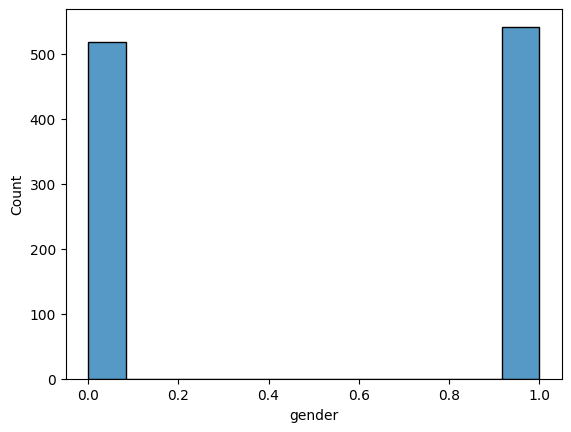

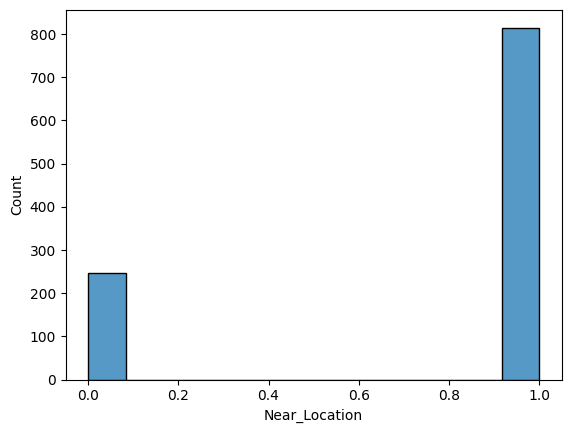

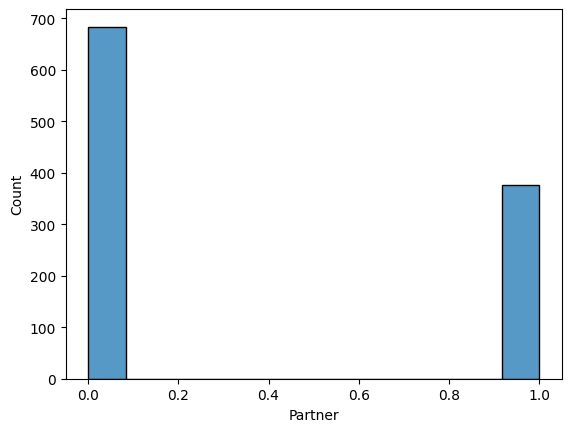

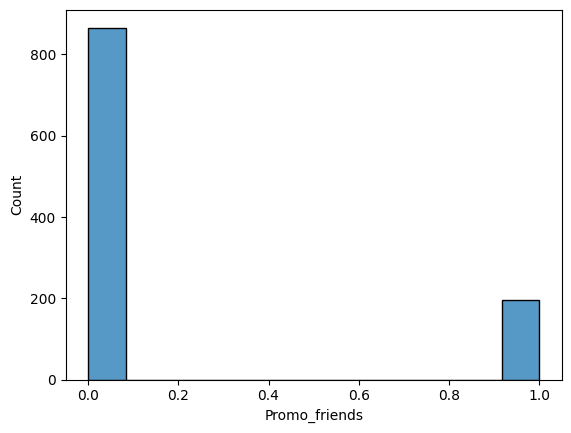

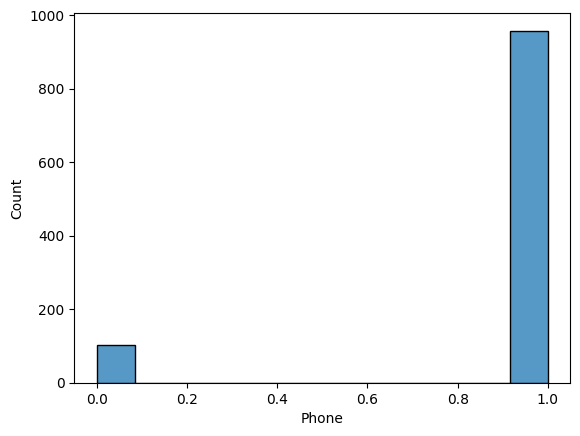

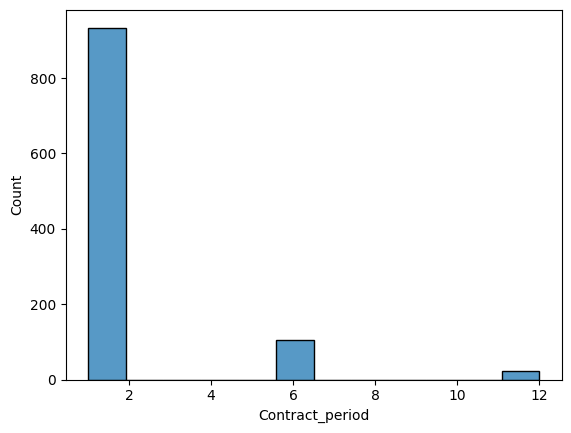

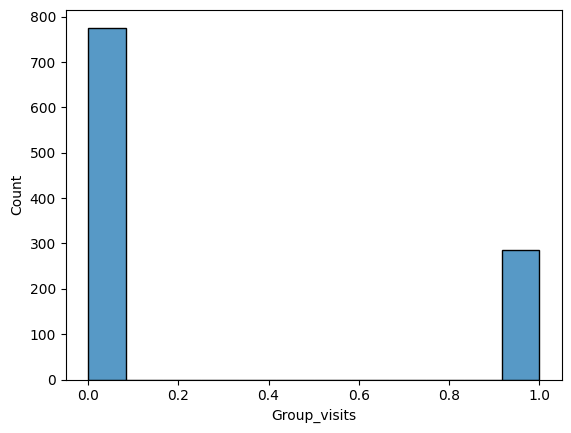

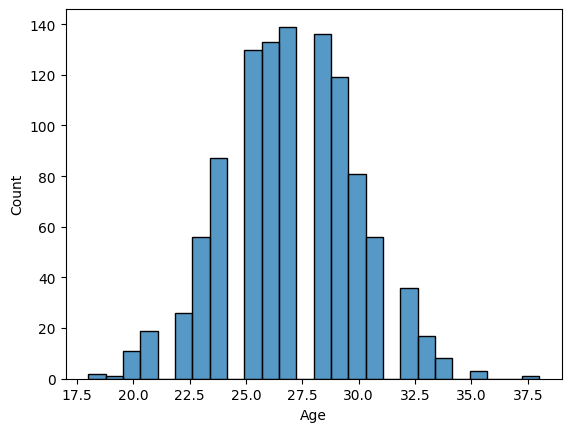

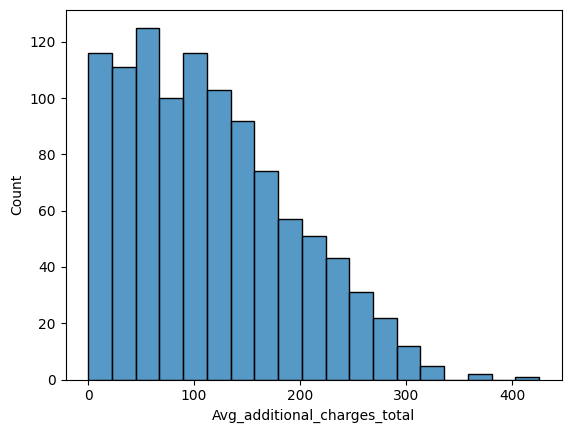

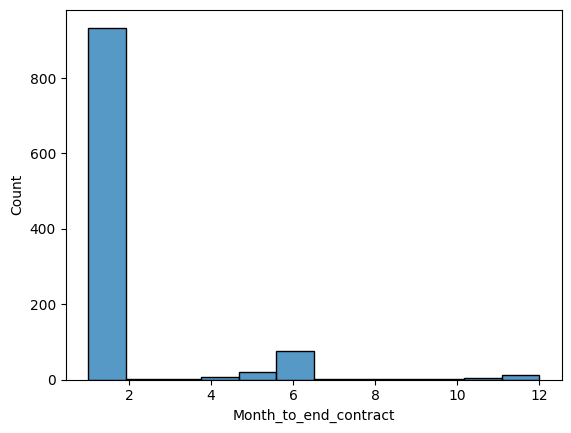

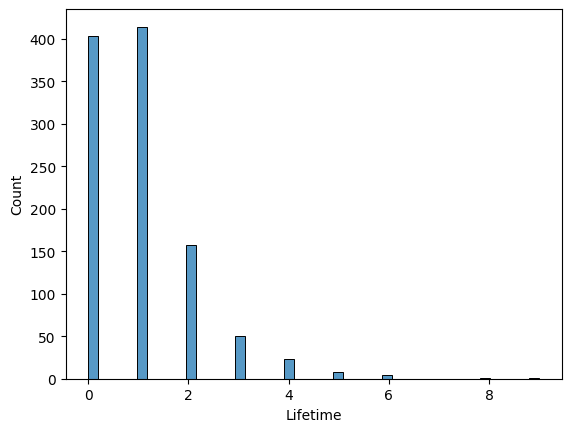

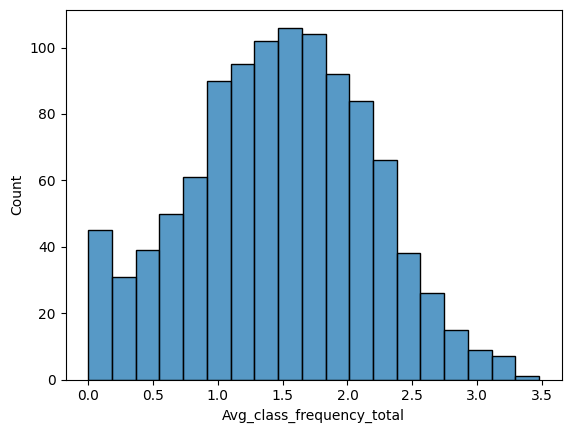

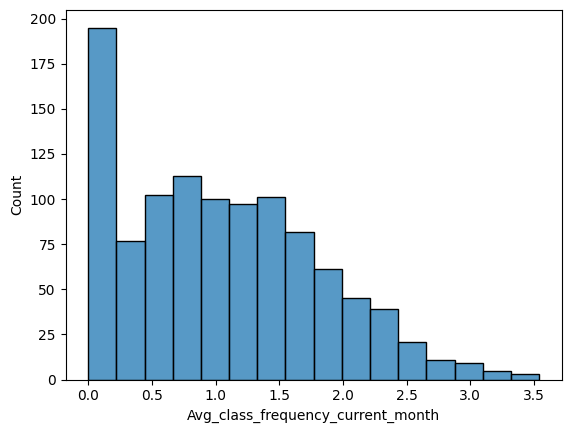

In [10]:
# traza diagramas de distribución pareada de característica-variable objetivo para cada característica
for col in group1.drop('Churn', axis=1).columns:
    sns.histplot(x=group1[col])
    plt.show()

Podemos observar lo siguiente:<br>
Un total de 1061 personas renunciaron al gimnasio.<br>
Las personas que renunciaron tenían en su mayoría el siguiente perfil: <br>
1.  Vivían cerca.<br>
2.  No trabajaban en una compañía con beneficios para el gimnasio. <br>
3.  No se inscribieron con una oferta de "trae un amigo".<br>
4.  Aportó con su número de teléfono. <br>
5.  Tenían un contrato menor a 2 meses. <br>
6.  No participaban en sesiones grupales.<br>
7.  Rondeaban la edad entre 25 y 30 años.<br>
8.  Gastaban un dinero en otros servicios del gimnasio aproximado a $100. <br>
9.  Su contrato de termina en un mes. <br>
10. Tienen un mes de recurrencia al gimnasio. <br>
11. La frecuencia media de visitas por semana durante vida como cliente es entre 1 y 2 veces. <br>
12. La frecuencia media de visitas por semana durante el mes actual es entre 0 y 1.5 veces. <br>

### ANALISIS DE PERSONAS QUE SIGUEN EN EL GIMNASIO

In [11]:
#personas que no renunciaron
group2 = data[data['Churn']==0]

In [12]:
group2.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.0
mean,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,0.0
std,0.499984,0.332933,0.498914,0.478144,0.295040,4.716942,0.498795,3.009933,99.801599,4.363522,3.874780,1.016006,1.018994,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,19.000000,0.171862,1.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,28.000000,76.920993,1.000000,2.000000,1.283137,1.297021,0.0
50%,1.000000,1.000000,1.000000,0.000000,1.000000,6.000000,0.000000,30.000000,149.881171,6.000000,4.000000,2.043252,2.046697,0.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,32.000000,224.448274,10.000000,6.000000,2.732944,2.740648,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,0.0


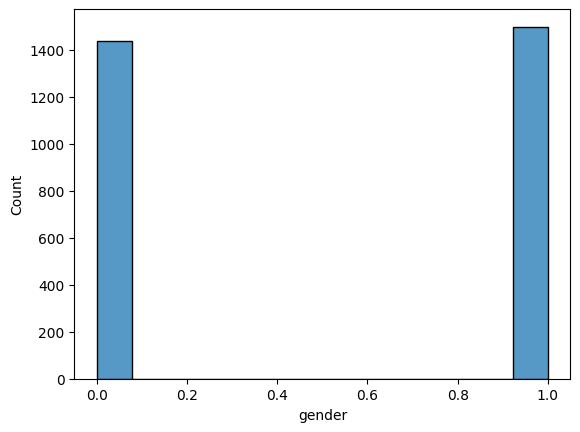

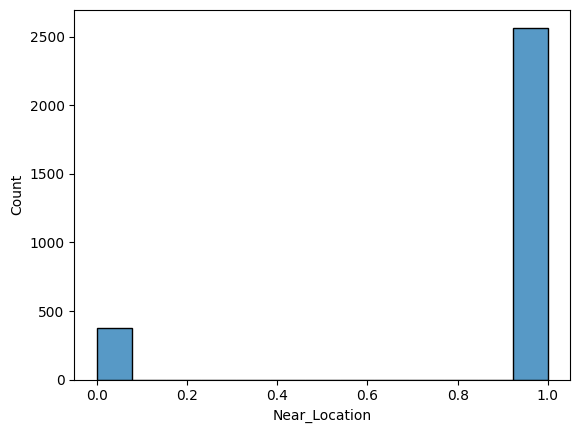

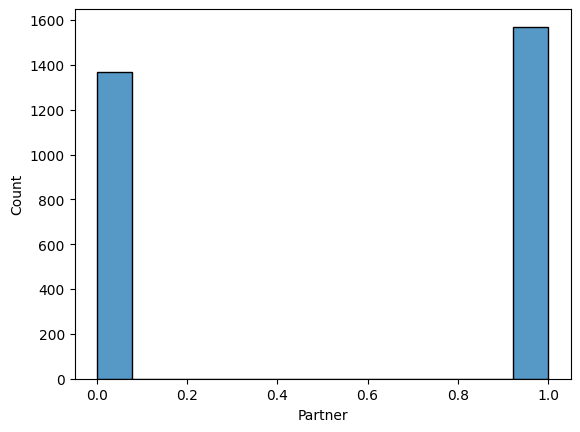

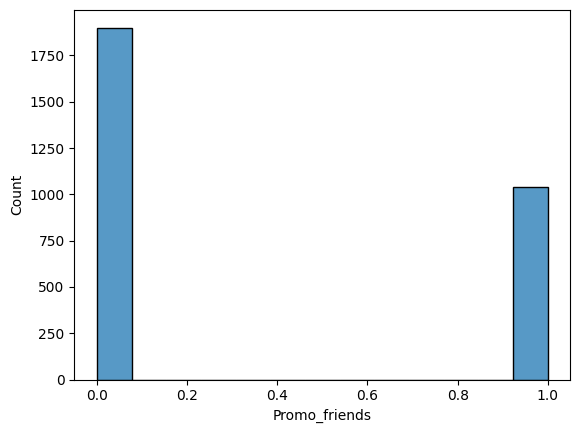

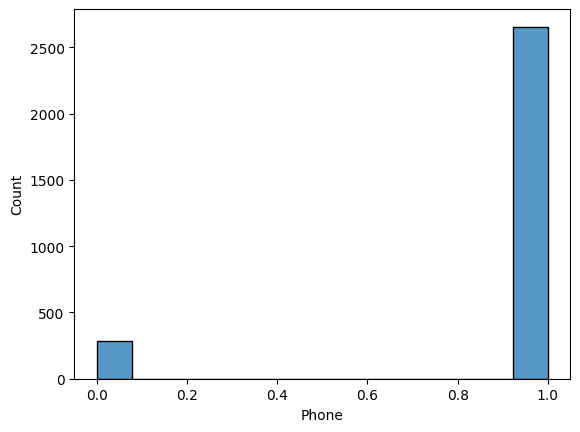

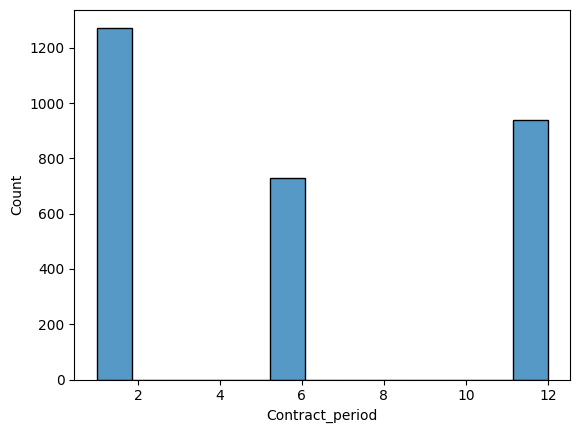

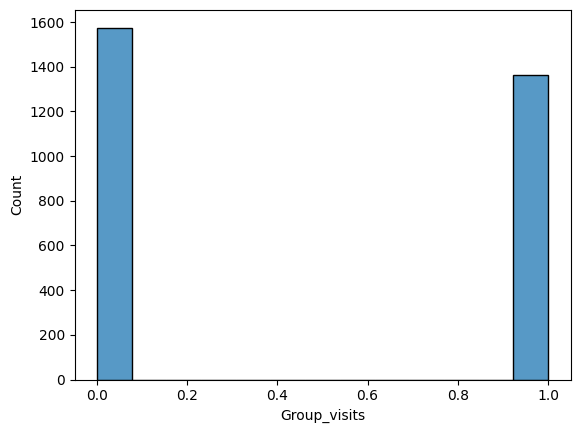

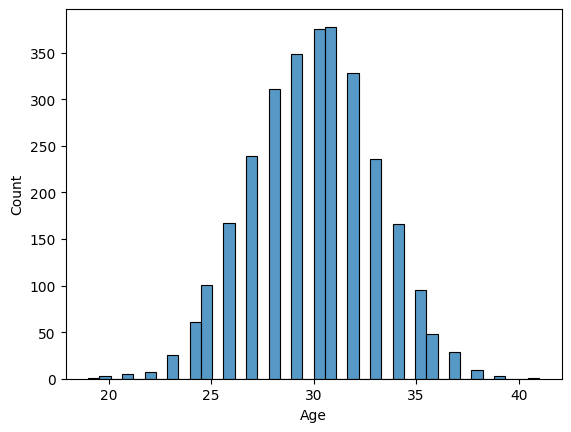

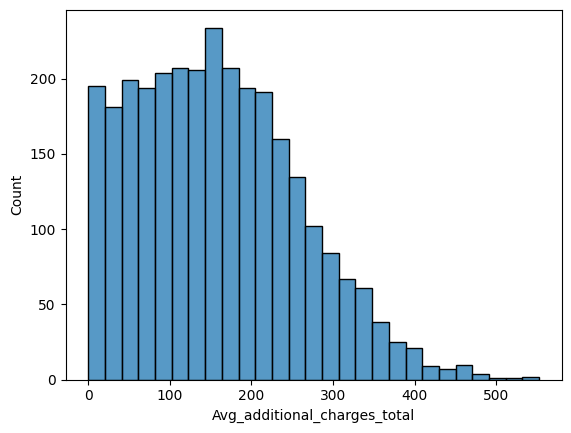

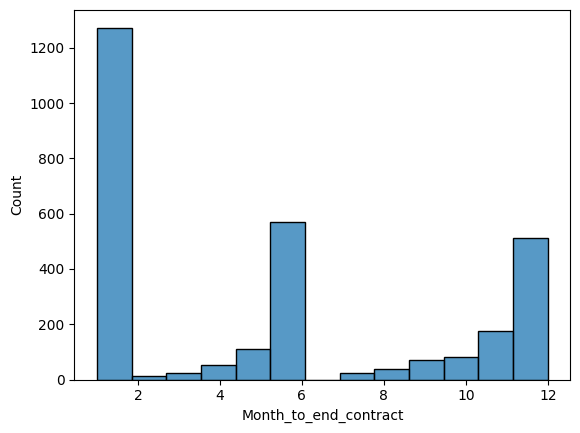

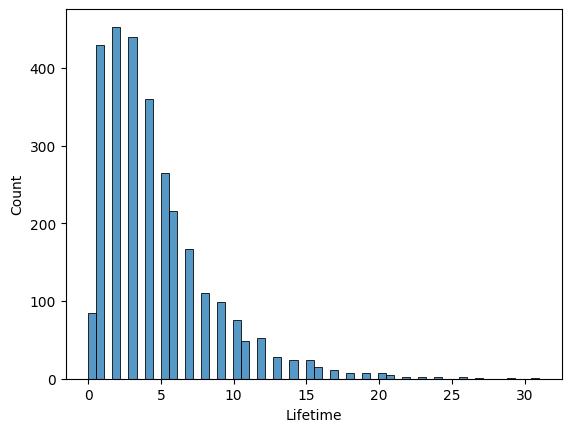

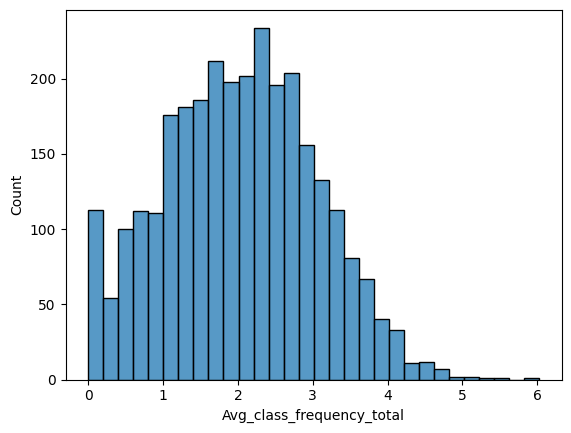

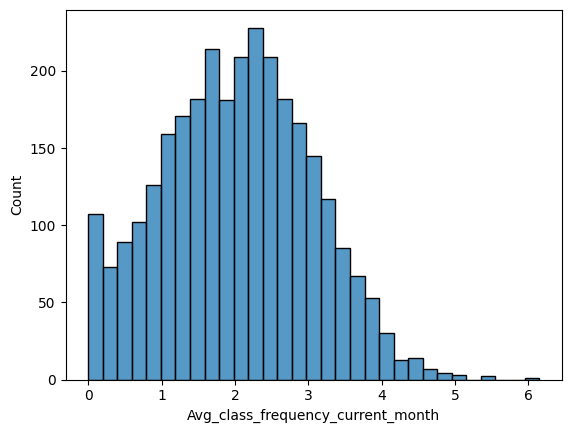

In [24]:
# traza diagramas de distribución pareada de característica-variable objetivo para cada característica
for col in group2.drop('Churn', axis=1).columns:
    sns.histplot(x=group2[col])
    plt.show()

Podemos observar lo siguiente: <br>
Un total de 2939 personas no renunciaron al gimnasio.<br>
Las personas que no renunciaron tenían en su mayoría el siguiente perfil: <br>
1.  Vivían cerca.<br>
2.  Trabajaban en una compañía con beneficios para el gimnasio a breves razgos,
porque se podria evaluar si hay realmente diferencia significativa si no fuese así. <br>
3.  No se inscribieron con una oferta de "trae un amigo".<br>
4.  Aportó con su número de teléfono. <br>
5.  Tienen contrato de 1, 6 y 12 meses. <br>
6.  No participaban en sesiones grupales a breves razgos,
porque se podria evaluar si hay realmente diferencia significativa si no fuese así..<br>
7.  Rondeaban la edad entre 27 y 34 años.<br>
8.  Gastaban un dinero en otros servicios del gimnasio aproximado a $150. <br>
9.  Su contrato de termina en un mes. <br>
10. Tienen 5 meses de recurrencia al gimnasio. <br>
11. La frecuencia media de visitas por semana durante vida como cliente es entre 1 y 3 veces. <br>
12. La frecuencia media de visitas por semana durante el mes actual es entre 1 y 3 veces. <br>

In [14]:
correlation = data.corr()

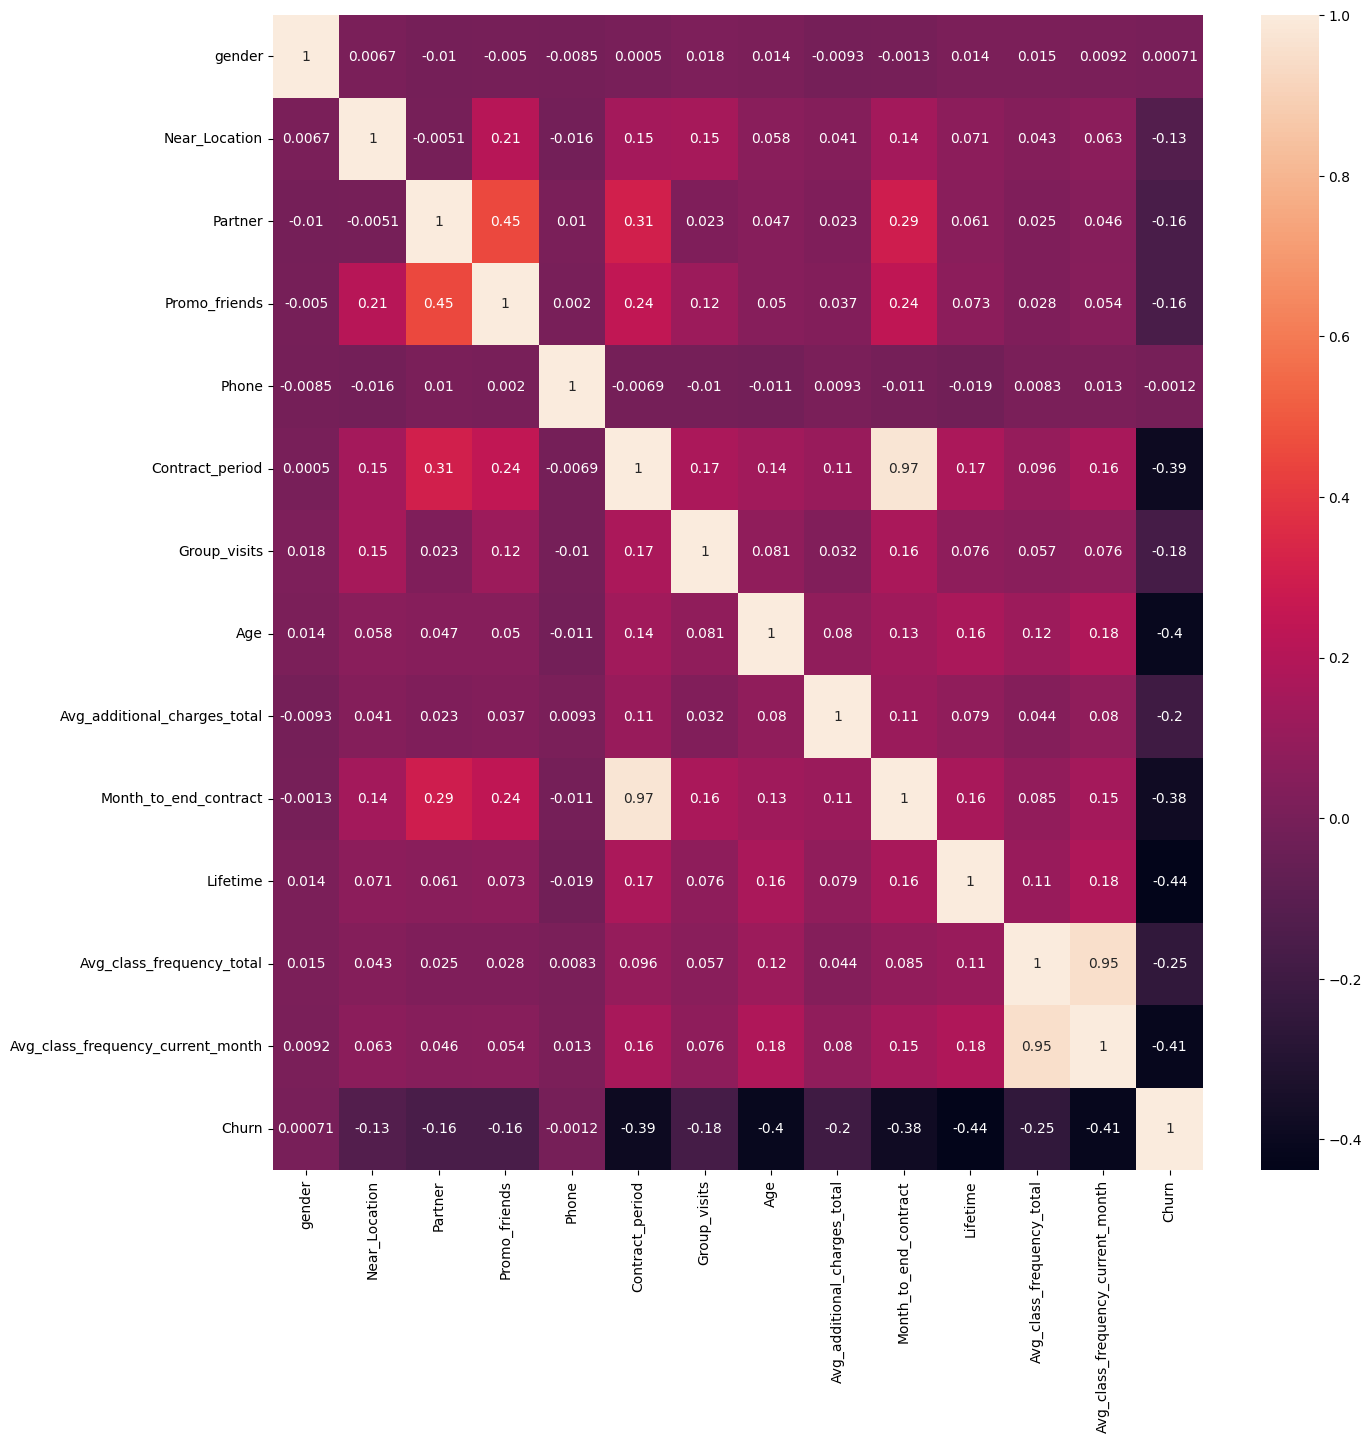

In [15]:
plt.figure(figsize=(15, 15))
sns.heatmap(correlation, annot=True)

plt.show()

Se logra observar una correlación mínima positiva de lo siguiente: <br>
1. Entre 'Near_Location' y 'Promo_friends' de 0.21  <br> 
2. Entre 'Parter' y 'Promo_friends' de 0.45 <br> 
3. Entre 'Parter' y 'Month_to_end_contract' de 0.29 <br> 
4. Entre 'Promo_friends' y 'Month_to_end_contract' de 0.24 <br>
5. Entre 'Parter' y 'Contract_period' de 0.31 <br>

Adicionalmente un efecto positivo con correlación demasiado alta del 95% entre 'Avg_class_frequency_current_month' y 'Avg_class_frequency_total' lo cual indica que estas dos variables están linealmente correlacionada creandose el efecto de multicolinealidad. Para solucionar dicho problema se debe mantener sólo las características cuyas correlaciones estan por debajo del umbral 0.8. Para hacer esto, se aplicará una regularización. 

In [16]:
data.drop('Avg_class_frequency_current_month' , axis = 1, inplace = True)

## MODELO PREDICTOR DE CANCELACIÓN DE SERVICIO

### REGRESIÓN LOGÍSTICA

In [17]:
# define la función que podrá generar nuestras métricas
def print_all_metrics(y_true, y_pred, y_proba, title = 'Métricas de clasificación'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

# divide los datos en características (la matriz X) y una variable objetivo (y)
X = data.drop('Churn', axis=1)
y = data['Churn']
# divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# entrena StandardScaler en el conjunto de entrenamiento
scaler = StandardScaler()
scaler.fit(X_train)

# transforma conjuntos de entrenamiento y de prueba
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# define el algoritmo para el modelo de regresión logística
lr_model = LogisticRegression(random_state=0)
# entrena el modelo 
lr_model.fit(X_train_st, y_train)
# utiliza el modelo entrenado para hacer previsiones
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
# muestra todas las métricas
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Métricas de regresión logística:')

Métricas de regresión logística:
	Accuracy: 0.90
	Precision: 0.78
	Recall: 0.81
	F1: 0.80
	ROC_AUC: 0.95


Se observa que la métrica de regresión logística señala lo siguiente: 
La exactitud es alta de 0.90, la precisión alta de 0,78, el rellamado de 0.81, el F1 de 0.81 y la curva característica operativa del receptor de 0.95. Lo cual indica que el modelo es muy bueno. 

### BOSQUE ALEATORIO

In [18]:
# define el algoritmo para el nuevo modelo de random forest
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
# entrena el modelo de random forest
rf_model.fit(X_train_st, y_train)
# utiliza el modelo entrenado para hacer previsiones
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
# muestra todas las métricas
print_all_metrics(y_test, rf_predictions, rf_probabilities, title='Métricas de random forest:')

Métricas de random forest:
	Accuracy: 0.89
	Precision: 0.80
	Recall: 0.76
	F1: 0.78
	ROC_AUC: 0.94


Con un bosque aleatorio la precisión aumenta a 0.8, pero el rellamado baja a 0.76 y  la curva característica operativa del receptor baja a 0.94 a comparación de la regresión logística. Sin embargo el modelo sigue siendo bueno. 

A breves razgos y conociendo que 2939 personas siguen en el gimnasio y 1061 han renunciado podemos decir que la mayoría de los usuarios se van a mantener en el gimansio. Sin embargo este comentario es muy vago. Por tanto se aplica las métricas de clasificación basada en clases conocidas (1 Renuncian y 0 No renuncian).  Cuando la exactitud este más cerca de 1, mejor predice el modelo. En este caso si no queremos prestar atención al equilibrio de las clases, se aplica la métrica de precisión y recall.
La precisión trata de medir que tantos errores comete nuestro modelo clasificando la variable objetivo, mientra recall mide que tan bueno es nuestro modelo localizando la clase objetivo. Dependiendo del contexto precision o recall tienen preferencia. En este caso el modelo de bosques aleatorio presenta una mayor precision. Para poder encontrar un equilibrio se utiliza la métrica armonizadora F1 que busca el equil

## CLÚSTER DE USUARIOS

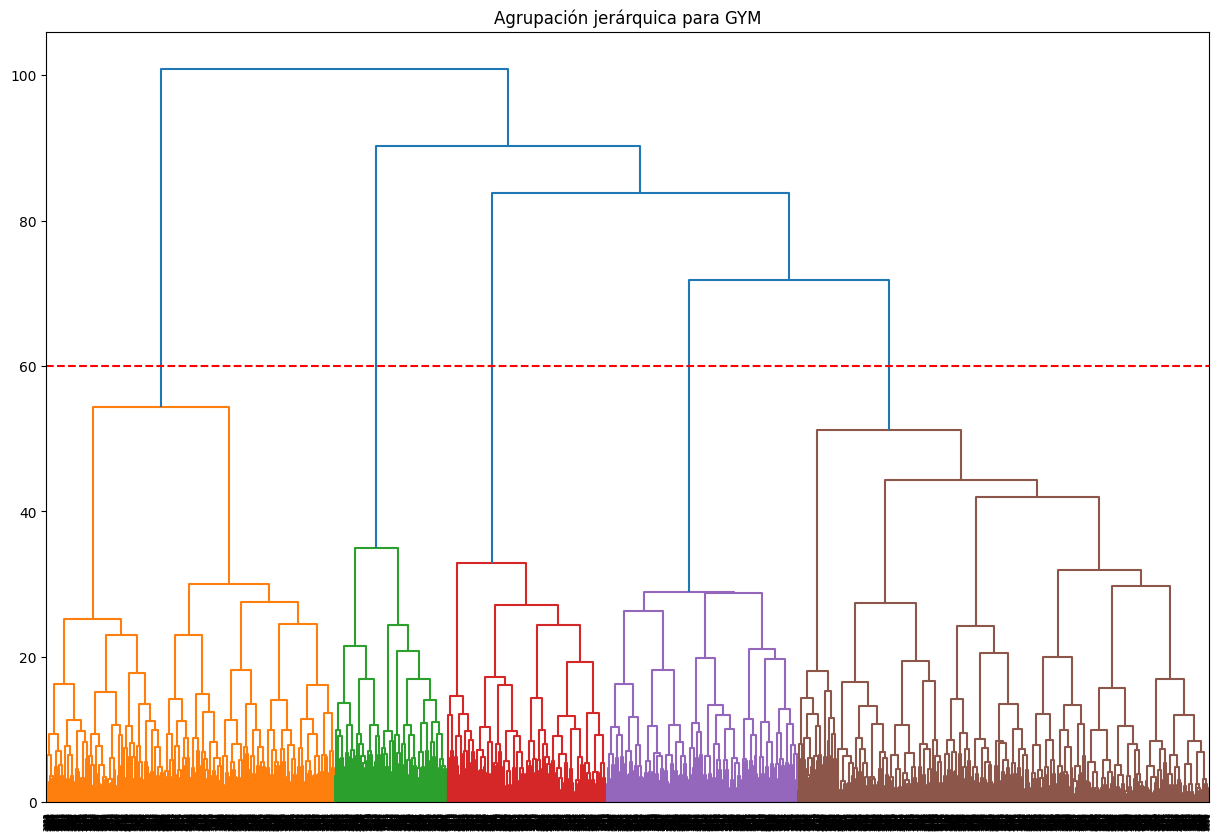

In [19]:
# la estandarización de datos obligatoria antes de pasarlo al algoritmo
sc = StandardScaler()
X_sc = sc.fit_transform(X)

km = KMeans(n_clusters = 5) # establecer el número de clústeres en 5
labels = km.fit_predict(X_sc) # aplicar el algoritmo a los datos y formar un vector de clúster

linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica para GYM')
plt.axhline(y=60, color='r', linestyle='--')
plt.show()

Como se puede observar en el dendrograma debido a la gran cantidad de observaciones tomó tiempo su ejecución lo cual es una desventaja, sin embargo se puede observar lo siguiente: <br>
1. Se crearon 5 clusters o grupos a partir de los datos sobre usuarios del gimnasio.  <br>
2. Se identifica los cinco clusters por los colores amarillo, verde, rojo, morado y café.  <br>
3. Se observa que existen características que tienen grandes diferencias debido a la longitud de las conexiones del dendrograma. 


In [20]:
# almacena etiquetas de clúster en el campo de nuestro conjunto de datos
data['cluster_km'] = labels

# obtiene las estadísticas de los valores medios de las características por clúster
data.groupby(['cluster_km']).mean()



,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Churn
cluster_km,,,,,,,,,,,,,
0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,0.266839
1,0.506829,0.998483,0.773900,1.000000,1.0,3.045524,0.459788,29.125948,142.735320,2.840668,3.813354,1.866970,0.247344
2,0.516171,1.000000,0.231565,0.000000,1.0,2.109314,0.375162,28.913325,142.008777,2.004528,3.326649,1.832461,0.357697
3,0.503831,0.000000,0.467433,0.080460,1.0,2.350575,0.216475,28.595785,136.452325,2.199234,2.909962,1.747056,0.429119
4,0.500564,0.951522,0.736189,0.467869,1.0,11.709132,0.550169,29.996618,166.036410,10.651635,4.738444,2.057579,0.020293


Basado en los datos de la tabla se concluye lo siguiente: <br>
1. El cluster 0, el cluster 1, cluster 4 muestra el perfil mayoritariamente de personas que no renuncian.<br>
2. El cluster 2 y cluster 3 de  personas que renuncian al gimnasio. <br>
3. Las personas que renuncian al gimnasio son aquellas que no trabajan en una compañía con descuentos en el gimnasio para empleados corporativos, aquellos que no se inscribieron con oferta "trae un amigo", aquellos que tienen un contrato aproximado a 2.42, aquellos que no participan en sesiones grupales, aquellos entre 27 y 28 años, aquellos que gastan menos de $136 en servicios adicionales del gimnasio, aquellos que les quedaba 2 meses de membresía, aquellos con una asistencia máxima de 2,8 meses, aquellos que frecuentaban 1,74 veces el gimnasio semanalmente. 

In [21]:
# define la función para representar gráficos de características pareadas para los clústeres
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(df[x_name], df[y_name],
          hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

Se observa una correlación debil entre la frecuencia media de visitas por semana de la vida como cliente y el proemdio de dinero total gastado en otros servicios del gimnasio. 


## CONCLUSIÓN Y RECOMENDACIÓN

En conclusión es importante explorar los datos para poder detectar aquellos factores que afectan en la decisión de los clientes. Las personas renuncian al gym por distintos factores que en conjunto conllevan a dejar de asistir. Como se observó en el análisis. Suelen salirse porque pagan un corto periodo de suscripción y no renuevan, no tienen descuentos porque no pertenecen a una empresa afiliada, y no suelen asistir a las sesiones grupales. Se debería implementar dentro de la estrategia de retención y captación de clientes paquetes o promociones para que contraten membresias más largas, adicionalmente incentivar la asistencia a sesiones grupales con arreglos temáticos. 